# Inspecting a recording of _Atelopus varius_

In this example, we'll use OpenSoundscape to explore the acoustic characteristics of a recording of the critically endangered frog _Atelopus varius_. 

We'll use a recording of wild male _Atelopus varius_ in Panama captured with an AudioMoth recorder. 

The unique properties of the vocalization highlight the frequency and time resolution tradeoff in spectrogram window length settings.

### Imports

In [167]:
# Import the Audio and Spectrogram classes from opensoundscape
from opensoundscape import Audio, Spectrogram

# import plotting libraries and change settings
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=[10,3] #for big visuals
%config InlineBackend.figure_format = 'retina'

# ignore a specific deprecation warning
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning, module='.*/IPython/.*')

### Load Audio

First, we load the audio file with the Audio class

In [193]:
# create Audio from file path
file_path = resource_path+'atelopus_varius_call.wav'
audio = Audio.from_file(file_path)
audio

<Audio(samples=(480000,), sample_rate=48000)>

Let's create a Spectrogram, which transforms the audio data into a 2-dimensional array measuring energy across frequency and time. 

### Create spectrograms

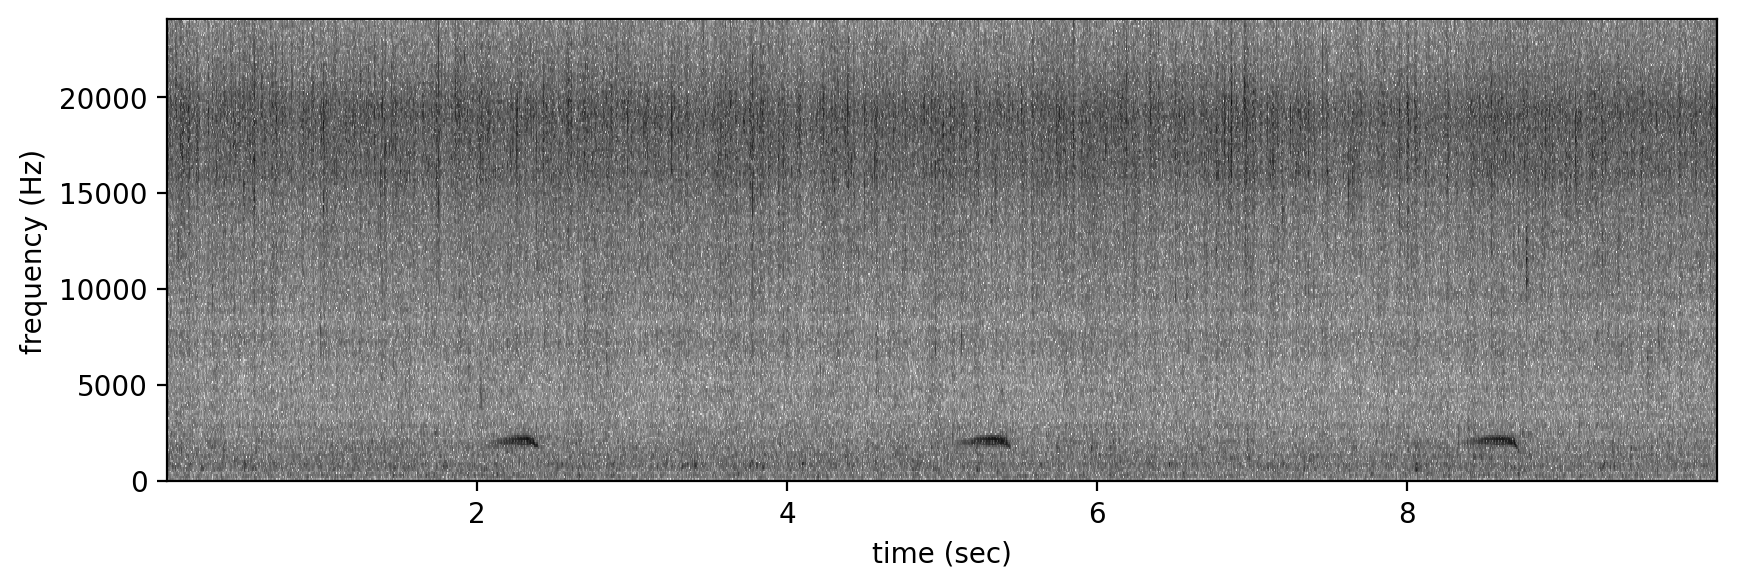

In [194]:
# create a Spectrogram object and call the plot method
Spectrogram.from_audio(audio).plot()

Let's 'zoom in' in on the first call, which occurs at 2 seconds, and reduce the decibel range to 'whiten' the spectrogram

In [226]:
plt.rcParams['figure.figsize']=[4,3]

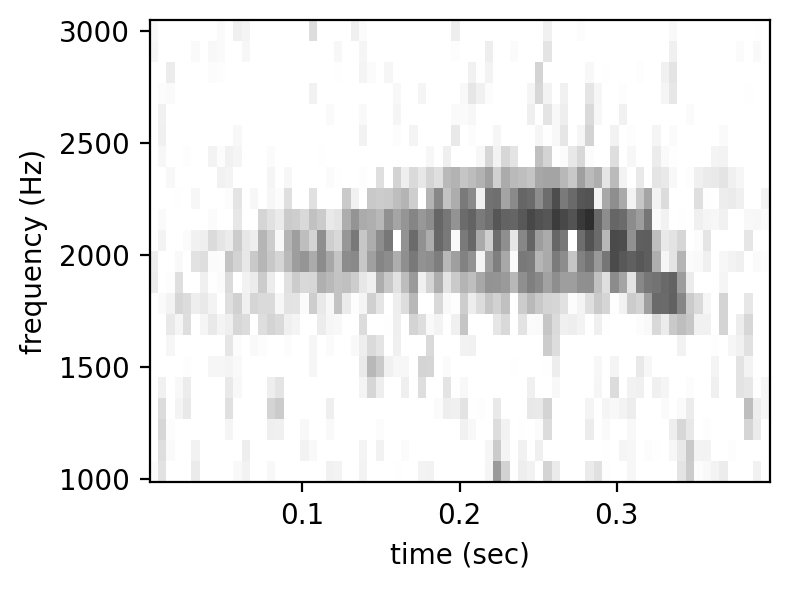

<Audio(samples=(19201,), sample_rate=48000)>

In [233]:
# trim the audio object to the region from 2 - 2.6 seconds
call = audio.trim(2.05,2.45)

# plot a spectrogram for the frequency range of 1-3 kHz
spec = Spectrogram.from_audio(call,decibel_limits=(-50,-20)).bandpass(1000,3000)
spec.plot()
call

The spectrogram is blurry, so in the next section we'll try to get more clarity on the call's structure.

### Inspecting harmonic and temporal characteristics

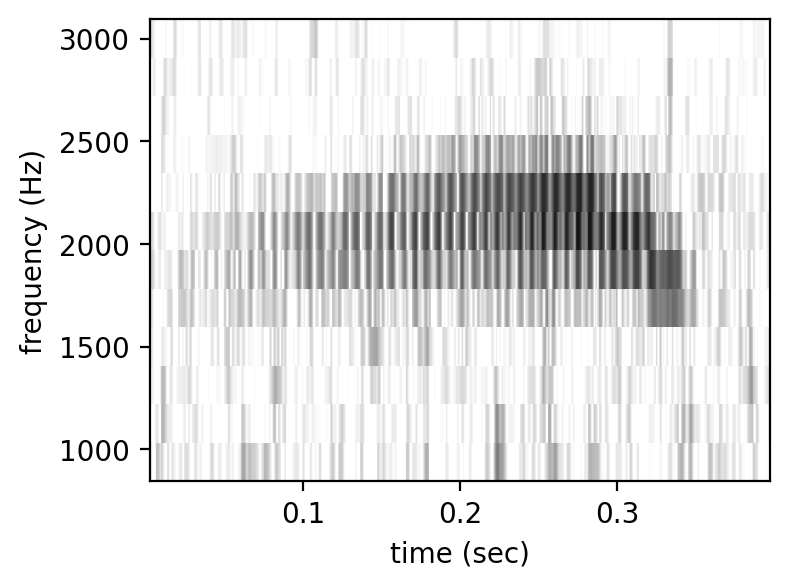

<Audio(samples=(19201,), sample_rate=48000)>

In [234]:
# adjust settings for high temporal resolution
spec = Spectrogram.from_audio(call,window_samples=256,overlap_fraction=0.9,decibel_limits=(-50,-20))
spec.bandpass(1000,3000).plot()
call

The unique, etherial sound of the frog's call must be due to something about acoustic structure of the call. Let's try to have a closer look at the harmonic structure and temporal structure of the call. 

We can adjust the parameters of the spectrogram to increase temporal resolution. 

Creating a spectrogram with high time resolutino reveals that the call is made of an extremely fast series of notes. This fast osciallation in volume is known as "amplitude modulation".  The notes occur too fast for our ears to distinguish them, leading to the buzzy quality that we perceive. 

There are about 13 pulses between 0.2 and 0.3 seconds, so the pulse repetition rate of this call seems to be about 130 pulses per second (Hz). 

On the other hand, we can increase frequency resolution (at the cost of temporal resolution) by increasing the `window_samples` parameter of the Spectrogram.

When we create a spectrogram with high frequency resolution, we see the ladder-like harmonic structure of the call, revealing that the sound is composed of several harmonic partials between 1700 and 2500 Hz, spaced only about 130 Hz from eachother. 

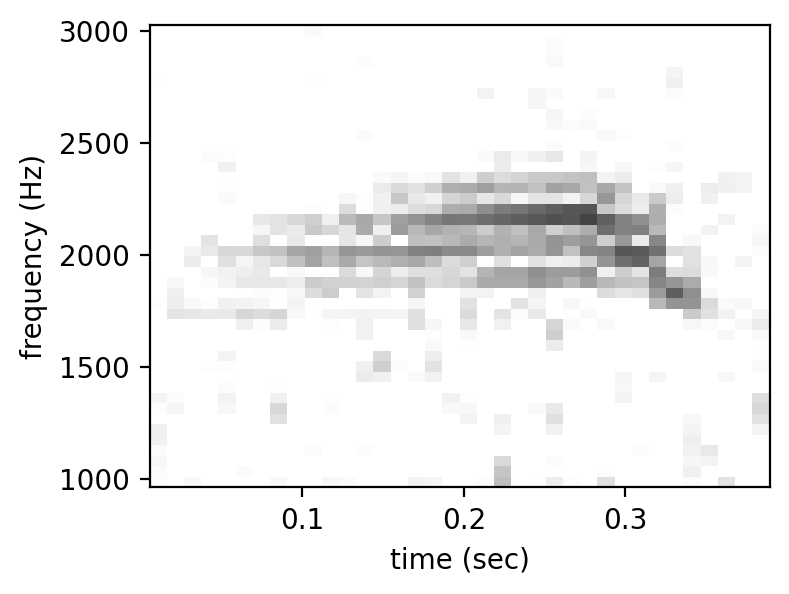

<Audio(samples=(19201,), sample_rate=48000)>

In [235]:
spec=Spectrogram.from_audio(call,window_samples=1024,decibel_limits=(-50,-20))
spec.bandpass(1000,3000).plot()

call

This seems surprising: how could the call have both fast pulsing and a complex harmonic structure with several closely-spaced frequencies? 

Perhaps the similarity of the pulse repetition rate (about 130 Hz) and the spacing between partials (also around 130 Hz) is not a coincidence. In fact, this leads to an interesting hypothesis: perhaps the amplitude modulation in the call is produced by "beating", the phenomenon of periodic cancellation and reinforcement of two waves with similar frequencies.

To illustrate the concept of bveating, imagine we have two sine waves with frequencies 100 and 105 Hz. The combination of the two waves will go in and out of phase with eachother over time: 

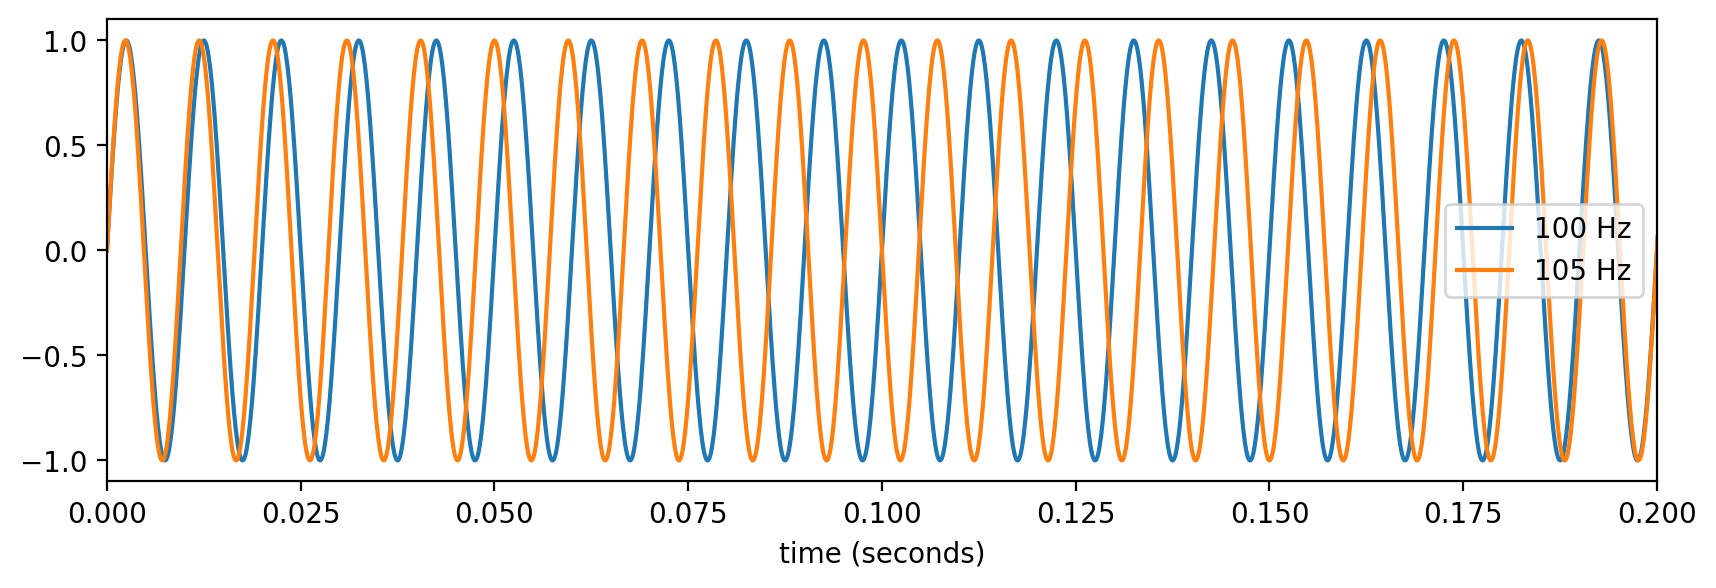

In [203]:
sample_rate=10000
t = np.arange(0,.5,1/sample_rate)
sine100 = np.sin(t*100*2*np.pi)
sine105 = np.sin(t*105*2*np.pi)
plt.plot(t,sine100,label='100 Hz')
plt.plot(t,sine105,label='105 Hz')
plt.xlim(0,.2)
plt.xlabel('time (seconds)')
plt.legend()

The waves start in phase with eachother (0 seconds). Over the course of 0.2 seconds, the faster wave gets completely out of phase (0.1 seconds) then back in phase with the slower wave (0.2 seconds). 


When the waves are summed, they will cancel and reinforce periodically with a periodicity equal to the _difference_ of frequencies of the two waves. In this example, the effect creates amplitude modulation at a frequency of 5 Hz. 

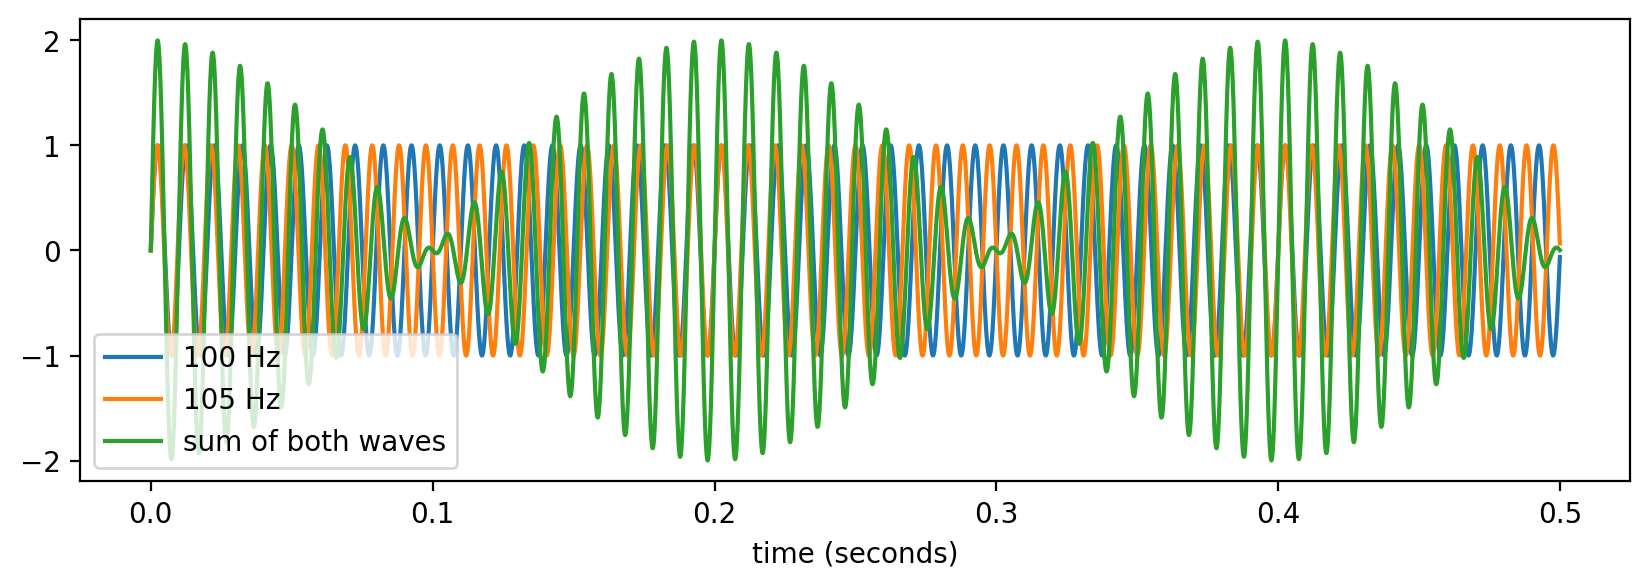

In [204]:
plt.plot(t,sine100,label='100 Hz')
plt.plot(t,sine105,label='105 Hz')
plt.plot(t,sine100+sine105,label='sum of both waves')
plt.xlabel('time (seconds)')
plt.legend()

## Isolate and plot the waveform of the A. varius call
To inspect the waveform of the _A.varius_ call and see if it looks like beating is occurring, we first should try to isolate the signal and boost its amplitude.

First, let's bandpass the audio to the frequency range of the _A. varius_ vocalization, reducing background noise from a stream:

In [205]:
bandpassed_audio = audio.bandpass(1700,2500,9)
bandpassed_audio

<Audio(samples=(480000,), sample_rate=48000)>

next, we normalize the audio to -5 dBFS, increasing the overall volume

In [206]:
normalized_audio = bandpassed_audio.normalize(peak_dBFS=-5)
normalized_audio

<Audio(samples=(480000,), sample_rate=48000)>

extract the audio samples from a short time segment within the call

In [207]:
samples = normalized_audio.trim(2.2,2.25).samples

Plot the audio samples against time

Text(0.5, 0, 'time (seconds)')

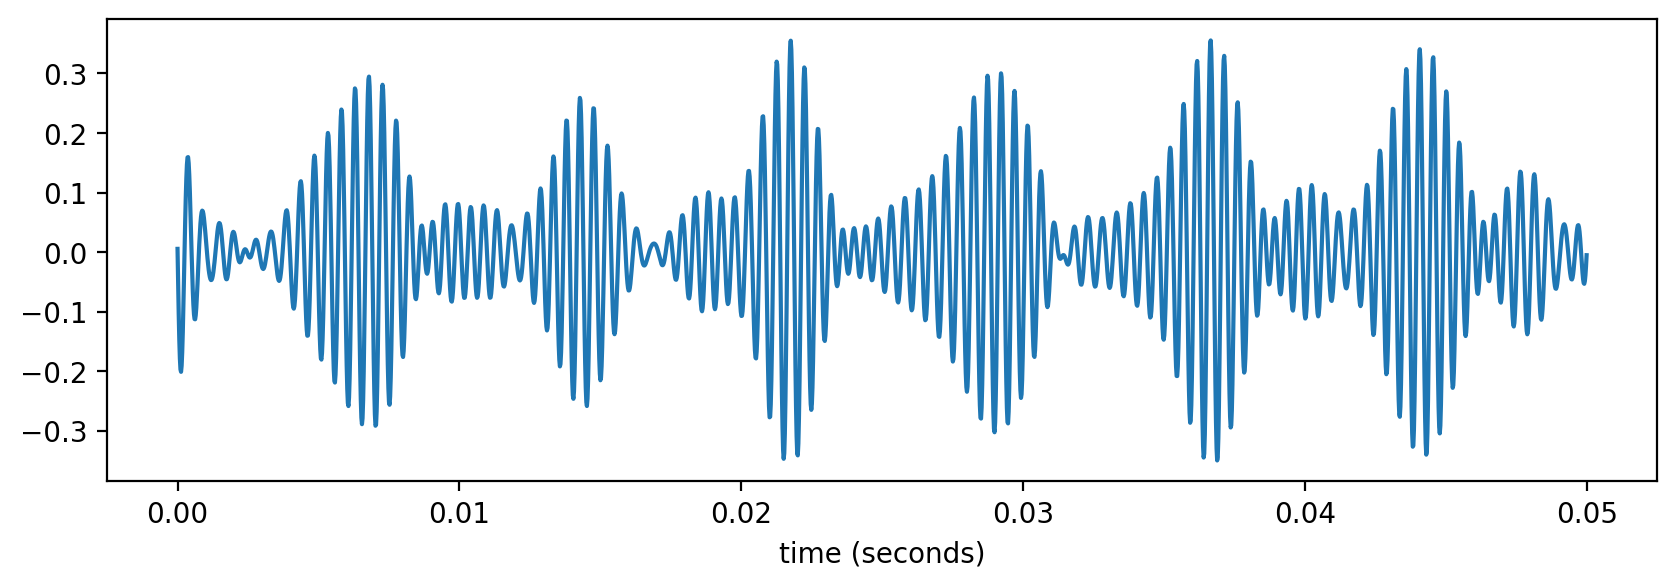

In [208]:
times = np.array(range(len(samples)))/call.sample_rate
plt.plot(times,samples)
plt.xlabel('time (seconds)')

Looking at the audio waveform, it shares some qualities in common with the 'beating' example above: the carrier frequency seems to be approximately consistent, but the amplitude oscillates periodically. 

This suggests that the 130 Hz amplitude modulation in the call of _A. varius_ is due to the production of frequencies spaced at about 130 Hz. 

The "rubbing" or beating of closely spaced frequencies may be what lends this call its etherial quality. 

### Further documentation
We've seen a few of the ways OpenSoundscape can be used to manipulate, visualize, and measure audio data. 

For full documentation of the [Audio]() and [Spectrogram]() classes, visit [opensoundscape.org](http://opensoundscape.org/en/latest/)